<a href="https://colab.research.google.com/github/virf96/Basico/blob/main/Ensambles_en_Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)

In [2]:
import missingno as msno

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data=pd.read_csv('/content/drive/MyDrive/datasets/Melbourne_housing_FULL.csv')

In [5]:
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


Melbourne housing clearance data from Jan 2016
Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude

Longtitude

In [6]:
data.describe(np.arange(.1,1,.1))

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
10%,2.000000,4.853000e+05,3.800000,3024.000000,2.000000,1.000000,1.000000,0.000000,73.00000,1910.000000,-37.919200,144.868480,2674.000000
20%,2.000000,5.946000e+05,5.600000,3042.000000,2.000000,1.000000,1.000000,179.000000,94.00000,1930.000000,-37.878900,144.912190,3650.000000
30%,3.000000,6.780000e+05,7.300000,3058.000000,3.000000,1.000000,1.000000,276.000000,109.00000,1950.000000,-37.852200,144.953790,4836.000000
40%,3.000000,7.700000e+05,8.500000,3073.000000,3.000000,1.000000,1.000000,385.000000,121.00000,1960.000000,-37.830930,144.988410,5556.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
60%,3.000000,1.000000e+06,11.400000,3125.000000,3.000000,2.000000,2.000000,587.000000,153.00000,1980.000000,-37.786780,145.032920,7809.000000


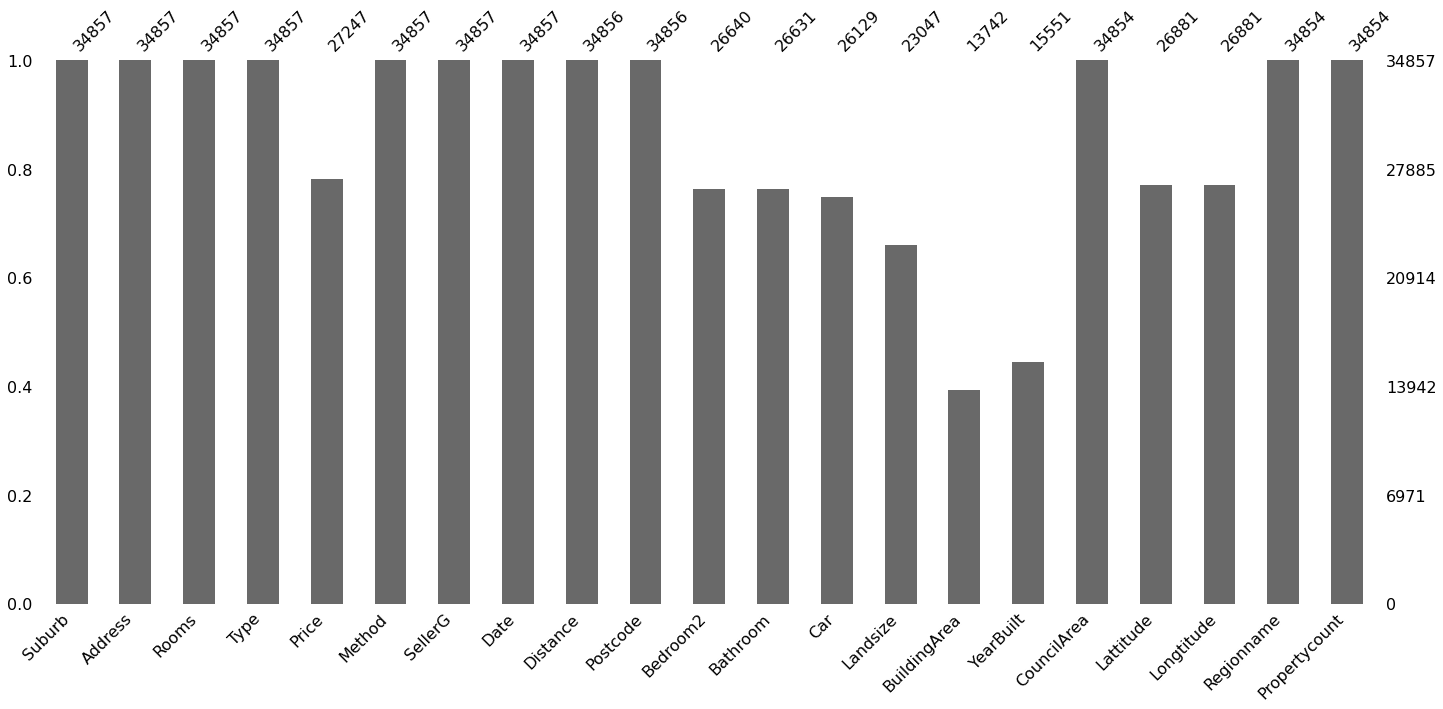

In [7]:
msno.bar(data)

In [8]:
data[['Bedroom2','Rooms']]

,Bedroom2,Rooms
0,2.0,2
1,2.0,2
2,2.0,2
3,3.0,3
4,3.0,3
...,...,...
34852,4.0,4
34853,2.0,2
34854,2.0,2
34855,NaN,3


In [9]:
data['Rooms'].isnull().sum()

0

In [10]:
data['Bedroom2'].isnull().sum()

8217

In [11]:
data[data['Rooms']==data['Bedroom2']]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,Yarraville,78 Bayview Rd,3,h,1101000.0,S,Jas,24/02/2018,6.3,3013.0,3.0,1.0,NaN,288.0,NaN,NaN,Maribyrnong City Council,-37.81095,144.88516,Western Metropolitan,6543.0
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


In [12]:
data.drop(columns=['Bedroom2'],inplace=True)

In [13]:
data.describe(np.arange(.1,1,.1))

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
10%,2.000000,4.853000e+05,3.800000,3024.000000,1.000000,1.000000,0.000000,73.00000,1910.000000,-37.919200,144.868480,2674.000000
20%,2.000000,5.946000e+05,5.600000,3042.000000,1.000000,1.000000,179.000000,94.00000,1930.000000,-37.878900,144.912190,3650.000000
30%,3.000000,6.780000e+05,7.300000,3058.000000,1.000000,1.000000,276.000000,109.00000,1950.000000,-37.852200,144.953790,4836.000000
40%,3.000000,7.700000e+05,8.500000,3073.000000,1.000000,1.000000,385.000000,121.00000,1960.000000,-37.830930,144.988410,5556.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
60%,3.000000,1.000000e+06,11.400000,3125.000000,2.000000,2.000000,587.000000,153.00000,1980.000000,-37.786780,145.032920,7809.000000


In [14]:
data[data['Bathroom']>2].describe(np.arange(.1,1,.1))

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,2552.000000,1.775000e+03,2552.000000,2552.000000,2552.000000,2543.000000,2193.000000,1519.000000,1649.000000,2546.000000,2546.000000,2552.000000
mean,4.344436,1.865236e+06,11.508856,3130.472179,3.202586,2.331891,908.873689,303.502210,1972.634324,-37.827554,145.030272,7156.455721
std,0.919803,1.037451e+06,6.124419,106.059908,0.584748,1.089952,9331.204756,1159.380905,38.886211,0.087561,0.108803,3687.494013
min,2.000000,4.400000e+05,1.200000,3000.000000,3.000000,0.000000,0.000000,0.000000,1854.000000,-38.184630,144.490000,129.000000
10%,3.000000,8.472000e+05,5.300000,3038.000000,3.000000,1.000000,270.000000,154.000000,1917.800000,-37.928590,144.891000,2698.000000
20%,4.000000,1.005000e+06,7.300000,3060.000000,3.000000,2.000000,382.400000,184.000000,1930.000000,-37.901480,144.948400,3988.000000
30%,4.000000,1.212800e+06,8.000000,3089.000000,3.000000,2.000000,516.600000,210.000000,1950.000000,-37.868680,144.998830,5061.600000
40%,4.000000,1.400000e+06,9.200000,3105.000000,3.000000,2.000000,591.000000,232.000000,1970.000000,-37.847870,145.020030,5678.000000
50%,4.000000,1.630000e+06,10.500000,3124.000000,3.000000,2.000000,643.000000,255.000000,1980.000000,-37.830230,145.042550,6763.000000
60%,4.000000,1.850000e+06,11.400000,3142.000000,3.000000,2.000000,677.000000,278.000000,1997.000000,-37.807300,145.062180,7717.000000


In [15]:
data[data['Bathroom']>7]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2536,Burwood,36 Cumming St,3,h,NaN,PI,Ross,8/10/2016,11.7,3125.0,12.0,0.0,946.0,NaN,1950.0,Monash City Council,-37.85300,145.11290,Southern Metropolitan,5678.0
8251,Preston,421 Murray Rd,4,h,760000.0,PI,Barry,22/05/2016,8.8,3072.0,8.0,7.0,1254.0,280.0,1928.0,Darebin City Council,-37.73670,144.98950,Northern Metropolitan,14577.0
17472,Camberwell,1088 Toorak Rd,8,h,2200000.0,PI,Ross,8/07/2017,7.7,3124.0,8.0,4.0,650.0,NaN,NaN,Boroondara City Council,-37.84812,145.07414,Southern Metropolitan,8920.0
25717,Burwood,79 Elgar Rd,10,h,2315000.0,SP,Buxton,28/10/2017,10.4,3125.0,9.0,2.0,612.0,466.0,2015.0,Monash City Council,-37.84461,145.10968,Southern Metropolitan,5678.0
26210,Mitcham,20 Harrison St,16,h,5000000.0,S,Buxton,28/10/2017,17.2,3132.0,8.0,8.0,NaN,NaN,NaN,Whitehorse City Council,-37.81405,145.19891,Eastern Metropolitan,6871.0


In [16]:
data.loc[data.BuildingArea<1].shape[0]/data.shape[0]

0.0022090254468256016

In [17]:
housing=data[data['BuildingArea']>1].copy()

In [18]:
housing.reset_index(drop=True,inplace=True)

In [19]:
housing['YearBuilt'].describe()

count    13150.000000
mean      1964.943878
std         37.879237
min       1196.000000
25%       1940.000000
50%       1970.000000
75%       2000.000000
max       2106.000000
Name: YearBuilt, dtype: float64

In [20]:
housing[housing['YearBuilt']>2009]['YearBuilt'].unique()

array([2014., 2010., 2013., 2012., 2016., 2011., 2015., 2017., 2018.,
       2106., 2019.])

In [21]:
housing['YearBuilt'].replace({2106:2016},inplace=True)

In [22]:
housing['data'] = pd.to_datetime(housing['Date'])


In [23]:
housing.dropna(subset=['Price'],inplace=True)

In [24]:
housing.reset_index(drop=True,inplace=True)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
data_t,data_v=train_test_split(housing,test_size=.2)

In [27]:

data_t['Landsize']= data_t['Landsize'].fillna(data_t['Landsize'].median())
data_t['Distance'] = data_t['Distance'].fillna(data_t['Distance'].median())
data_t['BuildingArea']= data_t['BuildingArea'].fillna(data_t['BuildingArea'].median())
data_t['Lattitude']= data_t['Lattitude'].fillna(data_t['Lattitude'].median())
data_t['Longtitude']= data_t['Longtitude'].fillna(data_t['Longtitude'].median())
data_t['Car']= data_t['Car'].fillna(data_t['Car'].median())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [28]:
continuas=['Rooms','Distance','Bathroom','Car','Landsize','BuildingArea','Lattitude','Longtitude']

In [29]:
variables=['Distance','Bathroom','Car','Landsize','BuildingArea']

In [30]:
for variable in variables:
    q1=data_t[variable].quantile(.25)
    q3=data_t[variable].quantile(.75)
    iqr=q3-q1
    data_t=data_t[~((data_t[variable]<q1-1.5*iqr)|(data_t[variable]>q3+1.5*iqr))]

In [31]:
Y=data_t[['Price']]
X=data_t[continuas]

In [32]:
X.isnull().sum()

Rooms           0
Distance        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
Lattitude       0
Longtitude      0
dtype: int64

In [33]:
import matplotlib.pyplot as plt

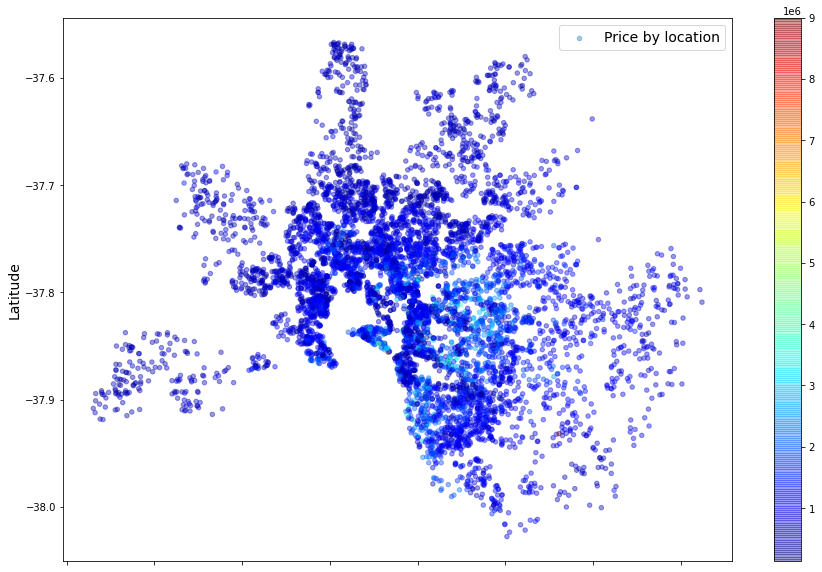

In [34]:
data_t.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.4,
c=data_t.Price, cmap=plt.get_cmap("jet"), label= 'Price by location', figsize=(15,10)) 
plt.ylabel("Latitude", fontsize=14)

plt.legend(fontsize=14)

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
tree = DecisionTreeRegressor()
tree.fit(X, Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [38]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def metricas(y_true,y_pred):
    r2=r2_score(y_true,y_pred)
    mae=mean_absolute_error(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    print(f'El r2 score es {r2}')
    print(f'El error cuadrático medio es {mse}')
    print(f'El error medio absoluto es {mae}')

In [39]:
metricas(Y,tree.predict(X))

El r2 score es 0.9999755788127926
El error cuadrático medio es 7889915.966386555
El error medio absoluto es 179.55182072829132


In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(X, Y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [42]:
metricas(Y,forest.predict(X))

El r2 score es 0.9688234342378318
El error cuadrático medio es 10072421209.294897
El error medio absoluto es 57103.0575728069


In [43]:
param_grid = {'n_estimators': [10, 25,50,70], 'max_features': [3,5,10], 
 'max_depth': [10,15,50,], 'bootstrap': [True, False]}


In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
Random_forest=RandomizedSearchCV(RandomForestRegressor(),param_grid,scoring='r2',n_iter=1000,cv=3,verbose=1,n_jobs=-1,)

In [46]:
Random_forest.fit(X,Y)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=1000. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   58.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [47]:
best_forest=Random_forest.best_estimator_

In [48]:
best_forest

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=70, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [49]:
metricas(Y,best_forest.predict(X))

El r2 score es 0.9999755673237494
El error cuadrático medio es 7893627.808266164
El error medio absoluto es 181.82272909163663


In [50]:
importances=forest.feature_importances_

In [51]:
feature_importance= sorted(zip(importances, list(X.columns)), reverse=True)

df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])


In [52]:
df

,importance,feature
0,0.312983,BuildingArea
1,0.212851,Distance
2,0.175550,Lattitude
3,0.157440,Longtitude
4,0.087629,Landsize
5,0.031159,Rooms
6,0.013435,Car
7,0.008953,Bathroom


## Conjunto de Validación

In [ ]:
data_v


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,data
1268,Elsternwick,4/585 Glen Huntly Rd,2,u,591000.0,S,Buxton,10/12/2016,8.5,3185.0,1.0,1.0,815.0,62.00,2008.0,Glen Eira City Council,-37.88570,145.01360,Southern Metropolitan,4898.0,2016-10-12
3574,Toorak,16/36 Grange Rd,1,u,460000.0,PI,hockingstuart,26/07/2016,4.6,3142.0,1.0,1.0,0.0,7.00,NaN,Stonnington City Council,-37.83730,145.01160,Southern Metropolitan,7217.0,2016-07-26
10040,Mitcham,425 Mitcham Rd,4,h,1400000.0,SP,Ray,17/02/2018,17.2,3132.0,1.0,NaN,902.0,138.00,1965.0,Whitehorse City Council,-37.82289,145.19443,Eastern Metropolitan,6871.0,2018-02-17
81,Alphington,4/2 Miller St,2,t,805000.0,S,Miles,12/11/2016,6.4,3078.0,2.0,3.0,155.0,140.00,2004.0,Darebin City Council,-37.78040,145.03080,Northern Metropolitan,2211.0,2016-12-11
3765,Yarraville,10 Tuppen St,5,h,1287000.0,S,hockingstuart,27/11/2016,7.0,3013.0,2.0,2.0,488.0,213.00,1930.0,Maribyrnong City Council,-37.81310,144.87780,Western Metropolitan,6543.0,2016-11-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3520,Thornbury,4/305 Rossmoyne St,2,u,505000.0,S,Jellis,16/04/2016,6.5,3071.0,1.0,0.0,0.0,80.00,1980.0,Darebin City Council,-37.75910,145.02110,Northern Metropolitan,8870.0,2016-04-16
1156,Coburg North,7 Manly Ct,3,h,700000.0,S,Nelson,7/05/2016,9.2,3058.0,1.0,2.0,626.0,108.00,1950.0,Darebin City Council,-37.72010,144.96960,Northern Metropolitan,3445.0,2016-07-05
4590,Sunshine,69 Duke St,3,h,710000.0,S,Village,29/04/2017,12.6,3020.0,1.0,0.0,483.0,93.84,1950.0,Brimbank City Council,-37.78750,144.84560,Western Metropolitan,3755.0,2017-04-29
8131,Bayswater,14 Greenglade Ct,3,h,831000.0,S,Ray,21/10/2017,23.2,3153.0,2.0,0.0,NaN,168.00,1970.0,Knox City Council,-37.85106,145.26135,Eastern Metropolitan,5030.0,2017-10-21


In [ ]:
data_v['Landsize']= data_v['Landsize'].fillna(data_t['Landsize'].median())
data_v['Distance'] = data_v['Distance'].fillna(data_t['Distance'].median())
data_v['BuildingArea']= data_v['BuildingArea'].fillna(data_t['BuildingArea'].median())
data_v['Lattitude']= data_v['Lattitude'].fillna(data_t['Lattitude'].median())
data_v['Longtitude']= data_v['Longtitude'].fillna(data_t['Longtitude'].median())
data_v['Car']= data_v['Car'].fillna(data_t['Car'].median())

data_v['Car']= data_v['Car'].fillna(data_t['Car'].median())

/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on 

In [ ]:
for variable in variables:
    data_v=data_v[~((data_v[variable]<q1-1.5*iqr)|(data_v[variable]>q3+1.5*iqr))]

In [ ]:
Y_v=data_v[['Price']]
X_v=data_v[continuas]

In [ ]:
metricas(Y_v,forest.predict(X_v))

El r2 score es 0.7962259503725974
El error cuadrático medio es 54782447460.96839
El error medio absoluto es 143269.77413690477


In [ ]:
metricas(Y_v,tree.predict(X_v))

El r2 score es 0.49142814509791277
El error cuadrático medio es 136724038081.60976
El error medio absoluto es 214979.51829268291


In [ ]:
metricas(Y_v,best_forest.predict(X_v))

El r2 score es 0.8110549925361568
El error cuadrático medio es 50795819994.38428
El error medio absoluto es 141013.13162539407


In [ ]:
pd.to_pickle(best_forest,'random_forest_houses.pkl')

In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
VotingRegressor?

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet,Ridge

In [ ]:
ridge=Ridge()
elastic=ElasticNet()
svm=SVR()
forest_reg=RandomForestRegressor()

In [ ]:
VotingRegressor?

In [ ]:
voting= VotingRegressor(estimators=[ ("elastic", elastic),("forest",best_forest),("svm",svm),('ridge',ridge)])

In [ ]:
voting.fit(X,Y)

/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


VotingRegressor(estimators=[('elastic', ElasticNet()),
                            ('forest',
                             RandomForestRegressor(max_depth=50, max_features=3,
                                                   n_estimators=70)),
                            ('svm', SVR()), ('ridge', Ridge())])

In [ ]:
metricas(Y,voting.predict(X))

El r2 score es 0.671436480763034
El error cuadrático medio es 104493530136.75671
El error medio absoluto es 211081.7335461525


In [ ]:
metricas(Y_v,voting.predict(X_v))

El r2 score es 0.6219561504067141
El error cuadrático medio es 101632996773.40959
El error medio absoluto es 209147.9498845031


In [ ]:
metricas(Y,voting.predict(X))

El r2 score es 0.8179753936004163
El error cuadrático medio es 57889548232.91969
El error medio absoluto es 163144.96122816895


In [ ]:
metricas(Y_v,voting.predict(X_v))

El r2 score es 0.727154556833282
El error cuadrático medio es 73351543940.83034
El error medio absoluto es 175366.3691634558


In [ ]:
pd.to_pickle(voting,'voting_housing.pkl')